In [25]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Add, AveragePooling2D
from keras.models import load_model, Model
#from keras.objectives import categorical_crossentropy

class DeltaCNN:
  # constructor
  def __init__(self):
    self.model = None

  # Define structure of the CNN
  def build(self, input_dim):
    input = Input(shape = input_dim) # X dau vao cua minh
    
    C1 = Conv2D(8, (3, 3), padding='same', activation='relu')(input)
    S2 = MaxPooling2D(pool_size=(2, 2), padding="same",strides=(2,2) )(C1)

    C3 = Conv2D(8, (3, 3), padding='same', activation='relu')(S2)
    C4 = Conv2D(8, (3, 3), padding='same', activation='relu')(C3)
    C5 = Add()([C4, S2])

    C6= Conv2D(16, (3, 3), strides = (2,2), padding='same', activation='relu')(C5)
    C7 = Conv2D(16, (3, 3), padding='same', activation='relu')(C6)
    C8 = Conv2D(16, (3, 3), padding='same', activation='relu')(C7)
    C9 = Add()([C8, C6])

    P10 = AveragePooling2D()(C9)
    flat = Flatten()(P10)
    F0 = Dense(400, activation='sigmoid', use_bias=True)(flat)
    output = Dense(10, activation='softmax', use_bias=True)(F0)

    self.model = Model(input, output)
    self.model.compile(optimizer="adam", loss = 'categorical_crossentropy', metrics=['accuracy'])
  
  # Train the model
  def train(self, x_train, y_train, x_val, y_val): # x_train chinh la X, y_train chinh la ground-truth
    self.model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 50, batch_size = 128)
  
  # Load model from file
  def load(self, model_file):
    self.model = load_model(model_file)
  
  # save the trained model
  def save(self, model_file):
    self.model.save(model_file)
  
  # Show the architecture of the model
  def summary(self):
    self.model.summary()

  # Test the model with a given input
  def predict(self, x_test):
    return self.model.predict(x_test)

In [26]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [27]:
import numpy as np

def onehot(y):
  oh = np.zeros((y.shape[0], 10))
  for i in range(y.shape[0]):
    oh[i, int(y[i])]=1
  return oh

In [28]:
from sklearn import preprocessing
import numpy as np

#enc = preprocessing.OneHotEncoder()

#enc.fit(y_train)

#y_train_oh = enc.transform(y_train).toarray()
#y_train_oh.shape
y_train_oh = onehot(y_train)
y_train_oh.shape

y_test_oh = onehot(y_test)
y_test_oh.shape

x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

#x_train_norm = x_train_norm[:,:,:, np.newaxis] # Optional: Convert 60000x28x28 -> 60000x28x28x1
#x_test_norm = x_test_norm[:,:,:, np.newaxis] # Optional: Convert 60000x28x28 -> 60000x28x28x1

In [29]:
x_train_norm.shape

(60000, 28, 28)

In [30]:
cnn = DeltaCNN()
cnn.build((28, 28, 1))
cnn.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_12 (Conv2D)             (None, 28, 28, 8)    80          ['input_3[0][0]']                
                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 14, 14, 8)   0           ['conv2d_12[0][0]']              
                                                                                                  
 conv2d_13 (Conv2D)             (None, 14, 14, 8)    584         ['max_pooling2d_2[0][0]']        
                                                                                            

In [31]:
cnn.save('bien-chung-delta.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


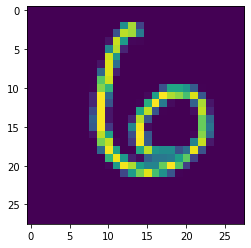

Predicted label:  6
Ground-truth label:  6


In [32]:
import matplotlib.pyplot as plt
new_cnn = DeltaCNN()

new_cnn.load('bien-chung-delta.h5')
pred = new_cnn.predict(x_test_norm)
index = 100
plt.imshow(x_test[index])
plt.show()
print('Predicted label: ', np.argmax(pred[index]))
print('Ground-truth label: ', y_test[index])